# Statistik-Labor Testat Aufgabe 1

Sie können dieses jupyter notebook als Vorlage für Ihre Lösung verwenden und nicht benötigte Teile rauslöschen bzw. Zellen für die Lösung ergänzen. <br> 
***Tipps und Hinweise:*** Alle Zellen, die mit _Tipps und Hinweise_ anfangen, können Sie löschen, falls Sie sie nicht (mehr) brauchen. <br>
Oder Sie kopieren die Aufgaben in ein eigenes Lösungsnotebook.<br>
Die Aufgaben werden auch als pdf zur Verfügung gestellt. 

# Aufgabe 1
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

# a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:***<br>
Um das Einlesen für den Beginn zu erleichtern, können Sie den folgenden Code verwenden, um die Datei mit den Datein einzulesen und Spaltenbeschriftungen zu ergänzen: 

In [8]:
import pandas as pd

#ToDo: 1. Speichern Sie die Datei sr_aufg_1_xy.txt aus Moodle in dem Ordner, 
#         in dem das jupyter Notebook mit Ihrer Lösung liegt. 
#         xy = Endziffern Ihrer Matrikelnummer
#      2. Ersetzen Sie im read_csv-Befehl beim Dateinamen xy durch Ihre Matrikelnummer
#      3. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen

df = pd.read_csv('../data/sr_aufg_1_59.txt', 
                   sep=';',  
                   encoding='unicode_escape', 
                   na_values='.', 
                   header = None, 
                   names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'])

## b) Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Geben Sie in einer Tabelle an, welche Datensätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 


***Tipps und Hinweise:*** <br>
- `print(df.to_string())` gibt alle Zeilen des DataFrame `df`aus. 
- Mit `df.loc([Liste])` oder `df.iloc([Liste])` können Sie sich alle Zeilen mit Indizes aus `[Liste]`anzeigen lassen (und z. B. in ein DataFrame speichern). 
- `df.loc[[0,8,15]]` oder `df.iloc[[0,8,15]]` liest die Zeilen mit Index 0, 8, 15 aus. 
- Haben Sie alle Datensätze mit _unbrauchbaren_ Geburtsdaten _gelöscht_? <br>
(„Phantasievolle“ Abänderungen oder erfundene Werte sind hier fehl am Platz.)
- Haben Sie umgekehrt alle Datensätze verwendet, bei denen man das Alter zum Stichtag ausrechnen kann?
- Die unbrauchbaren Datensätze sollen nicht in Ihrer Analyse auftauchen. Sie sollten jedoch auch nicht endgültig gelöscht werden. Sammeln Sie diese Datensätze in einer eigenen Tabelle, die Sie dann auch als Antwort für Aufgabenteil 1b) benutzen können. Fügen Sie dieser Tabelle auch eine Kopie der Datensätze hinzu, die nach einer Korrektur verwendbar sind. 
- Die Tabelle für 1b) könnte Einträge beinhalten wie z. B. 

| Pers.Nr. | Anrede | Name   | Vorname | Geburtsdatum | Fehler               | Behandlung |
|----------|--------|--------|---------|--------------|----------------------|------------|
| 098 	   | Herr   | Meyer  | Hans    | 02.11.       | Jahr fehlt           | Löschen    | 
| 102 	   | Frau   | Müller | Gerda   | 03. Mai 1988 | Monat ausgeschrieben | Korrektur  |


- Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>

### Wonach aussortiert wurde
1. passt das Datum in den date-Regex (\[1-31\].\[1-12\].\[19xx\])? ( theoretisch hätten hier ungültige daten z.B. 31.2.xxxx herauskommen können, aber diese existieren in den daten nicht. )
2. existiert der wert für das datum ( is NaN ? )?

### Wann wurde gelöscht?
1. wenn das Geburtsdatum nicht vollständig auflösbar ist. z.B. Jahr/Monat/Tag fehlt oder existier (noch) nicht oder ist zu lange her.
2. wenn das Datum fehlt oder nicht als Datum interpretierbar ist. z.B. "wpanaüAON" oder "    "

### Wann wurde bearbeitet?
Wenn das Datum zwar in einem falschen Format oder in der falschen Zeile, aber dennoch einen genauen Tag zugeordnet werden kann.

### Was wurde wie verändert?
Siehe in der Tabelle unter dieser Zelle ( Dataframe "corrupted" ), insbesondere die Spalten "Error", "Fix" und "edited-to"


In [9]:
# essentially what were are doing here, ist using a boolean mask to filter out dates that dont fit into our criteria
# im doing it with an regex, which just returns if the given string fits into a given pattern.
# you could also combine this step with part c) and parse the date into a Timestamp type and using error catching to filter out invalid dates

# the second filter is just filtering out unreadable values ( NaN )

# fixing errors
filter = df.Geburtsdatum.str.contains('(0[1-9]|1[0-9]|2[0-9]|3[0-1])\.(0[1-9]|1[0-2])\.(19[0-9][0-9])')
corrupted1 = df.loc[filter == False]
filter = df.Geburtsdatum.isna()
corrupted2 = df.loc[filter == True]
corrupted = pd.concat([corrupted1, corrupted2])
corrupted = corrupted.sort_index()

corrupted['Error'] = "N/A"
corrupted['Fix'] = "N/A"
corrupted['edited-to'] = "N/A"
# editing row 19
row = 19
corrupted.at[row, 'Error'] = "invalid date"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

# editing row 24
row = 24
corrupted.at[row, 'Error'] = "date missing"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

# editing row 34
row = 34
corrupted.at[row, 'Error'] = "date missing"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

#editing row 44
row = 44
corrupted.at[row, 'Error'] = "date missing"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

#editing row 51
row = 51
corrupted.at[row, 'Error'] = "date in wrong place"
corrupted.at[row, 'Fix'] = "edit"
corrupted.at[row, 'edited-to'] = "12.02.1967"
df.at[row, 'Vorname'] = "Hans"
df.at[row, 'Nachname'] = "Schwarz"
df.at[row, 'Geburtsdatum'] = "12.02.1967"

#editing row 54
row = 54
corrupted.at[row, 'Error'] = "date in wrong place"
corrupted.at[row, 'Fix'] = "edit"
corrupted.at[row, 'edited-to'] = "10.12.1984"
df.at[row, 'Vorname'] = "Dorothea"
df.at[row, 'Nachname'] = "Schwab"
df.at[row, 'Geburtsdatum'] = "10.12.1984"

#editing row 94
row = 94
corrupted.at[row, 'Error'] = "invalid date"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

#editing row 100
row = 100
corrupted.at[row, 'Error'] = "wrong date format"
corrupted.at[row, 'Fix'] = "edit"
corrupted.at[row, 'edited-to'] = "19.04.1959"
df.at[row, 'Geburtsdatum'] = "19.04.1959"

#editing row 102
row = 102
corrupted.at[row, 'Error'] = "wrong date format"
corrupted.at[row, 'Fix'] = "edit"
corrupted.at[row, 'edited-to'] = "13.02.1985"
df.at[row, 'Geburtsdatum'] = "13.02.1985"

#editing row 104
row = 104
corrupted.at[row, 'Error'] = "invalid date"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

#editing row 109
row = 109
corrupted.at[row, 'Error'] = "invalid date"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

#editing row 111
row = 111
corrupted.at[row, 'Error'] = "date missing"
corrupted.at[row, 'Fix'] = "delete"
df = df.drop(row)

filter = corrupted.Fix.str.contains('delete')
unusable = corrupted.loc[filter == True]
# unusable is a list of entries, that are not fixable and thus cannot be used

corrupted

/tmp/ipykernel_102100/2807419850.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filter = df.Geburtsdatum.str.contains('(0[1-9]|1[0-9]|2[0-9]|3[0-1])\.(0[1-9]|1[0-2])\.(19[0-9][0-9])')


,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum,Error,Fix,edited-to
19,20,Herr,Torsten,Wagner,12.06.25404,invalid date,delete,N/A
24,25,Herr,Peter,König,cwnitTsOaY,date missing,delete,N/A
34,35,Herr,Anton,Vogt,xxxx,date missing,delete,N/A
44,45,Herr,Stefan,Mayer,,date missing,delete,N/A
51,52,Herr,Hans Schwarz,12.02.1967,NaN,date in wrong place,edit,12.02.1967
54,55,Frau,Dorothea Schwab,10.12.1984,NaN,date in wrong place,edit,10.12.1984
94,95,Frau,Anja,Sauer,29.05.1206,invalid date,delete,N/A
100,101,Herr,Philipp,Kaufmann,am 19. April 1959,wrong date format,edit,19.04.1959
102,103,Herr,Bertram,Zimmermann,"February 13th, 1985",wrong date format,edit,13.02.1985
104,105,Frau,Marion,Schneider,31.,invalid date,delete,N/A


## c) Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geboren ist, ist zum Stichtag 30 Jahre alt. 
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) <br> Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipps und Hinweise:*** <br>
- In Python ist hierzu die Pandas-Bibliothek mit ihrer Funktion `pandas.to_datetime()`, sowie dem Attribut `.year` für datetime-Objekte nützlich. <br>
Beispiel: `datum = pd.to_datetime('4.7.23', dayfirst=True)`, `datum.year` 
(Anm: `dayfirst=True` für europäisches Format, in den USA kommt der Monat zuerst, also z. B. 03/25/2023 für 25. März)
- Will man `.year`auf eine Spalte eines DataFrame anwenden, die in datetime-Format vorliegt, so kann man dies mit `df['Spalte'].dt.year`
- Prüfen Sie an ein paar Beispielen, ob das richtige Alter gerechnet wird. Am besten benutzen Sie für diese Überprüfung Geburtstage Ende Dezember oder Anfang Januar:
Geburtstag 31.12.1975 $\rightarrow$ Alter 30; Geburtstag 01.01.1976 $\rightarrow$ Alter 29.


In [10]:
# what we are doing here ist basically parsing the date given into a Timestamp, so we can calculate the difference in time to the given counting date.
# we then apply this function to all rows and create a new column with the corresponding age of the person

# the only thing we need to catch is the case that the person was born on the 31.12.

import math
def dateToAge(date):
    ref = pd.to_datetime('31.12.2005', format='%d.%m.%Y', dayfirst=True)
    birth = pd.to_datetime(date, format='%d.%m.%Y', dayfirst=True)
    if(ref.day == birth.day and ref.month == birth.month):
        return math.floor(((ref-birth).days + 1)/365.25)
    return math.floor(((ref-birth).days)/365.25)
df['Alter'] = df['Geburtsdatum'].apply(dateToAge)

# print(dateToAge("31.12.2001")) # should all print the same
# print(dateToAge("01.01.2001")) # ""
# print(dateToAge("30.12.2001")) # ""
# print(dateToAge("01.01.2002")) # should print 1 less

df

,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum,Alter
0,1,Herr,Helmut,Lang,17.07.1962,43
1,2,Frau,Alexandra,Schreiber,07.08.1968,37
2,3,Herr,Jan,Rapp,06.06.1943,62
3,4,Herr,Oliver,Meier,16.10.1957,48
4,5,Herr,Daniel,Fink,16.01.1952,53
...,...,...,...,...,...,...
105,106,Frau,Kerstin,Anders,01.10.1962,43
106,107,Herr,Steffen,Hartmann,09.04.1945,60
107,108,Herr,David,Schmitt,06.02.1979,26
108,109,Herr,Alexander,Lange,29.01.1944,61


## d) Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden und die Säulen mit den zugehörigen Anzahlen beschriftet werden.

***Tipps und Hinweise:*** <br>
- Sie können die Tabelle mit Boolean Masking (s. Einführung zu Aufgabe 1) nach Männer bzw. Frauen filtern. 
- Mit `pandas.cut()`können Sie eine Häufigkeitstabelle mit Klassen erstellen. 
- Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`.
- ***Beispiellösung:***
<div>
<img src="img/a1_bar_chart.png" width="500"/>
</div>
- Die Auszählung nach Altersklassen, die für die Aufgabenteile 1d) und 1e) anzufertigen ist, können Sie anhand der in der Datei „Teilergebnisse_xy.txt“ (xy = Endziffern Ihrer Matrikelnummer) angegebenen Summen teilweise kontrollieren. 
- Bitte überprüfen Sie für die Aufgabenteile d) und e) auch:
   - Diagramme sollten grundsätzlich eine Überschrift haben. Gibt es $x$- und $y$-Achse, sollen sie einen Achsentitel haben (im Säulendiagramm z. B. „Alter in Jahren“ sowie „Anzahl“).
   - Sind alle Diagramme so beschriftet (z. B. die Säulen im Säulendiagramm mit Anzahlen, die Kreissektoren mit Prozentzahlen), wie das verlangt ist? (Vgl. auch die Muster zu Teilaufgabe e))

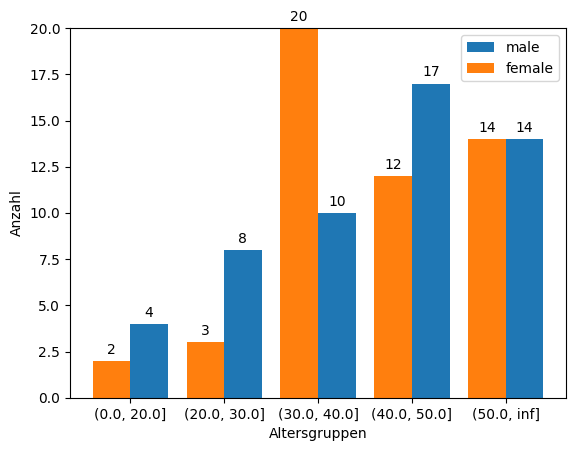

In [11]:
# what we are doing here is using the Ages calculated above and put them into a bar graph.
# we sort between male and female and sort these lists with the given intervals ( including the right edge ).

# the rest of the formating is basically copied from the example given for this task.

import matplotlib.pyplot as plt
import numpy as np
mask_male = df['Anrede'] == "Herr"
male = df.loc[mask_male == True]
female = df.loc[mask_male == False]
bins = pd.IntervalIndex.from_tuples([(0,20),(20,30),(30,40),(40,50),(50,float("inf"))])
male_int = pd.cut(male['Alter'], bins, right=True).value_counts().sort_index().reset_index()
male_int.columns = ['range', 'count']
female_int = pd.cut(female['Alter'], bins, right=True).value_counts().sort_index().reset_index()
female_int.columns = ['range', 'count']
all_int = pd.cut(df['Alter'], bins, right=True).value_counts().sort_index().reset_index()
all_int.columns = ['range', 'count']

fig, ax = plt.subplots()
x = np.arange(len(male_int))
bar_width = 0.4
rects1 = plt.bar(x+bar_width/2, male_int['count'], width = bar_width, label='male')
rects2 = plt.bar(x-bar_width/2, female_int['count'], width = bar_width, label='female')

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)

plt.ylim(0,20)

plt.legend()
ax.set_xticks(x)
ax.set_xticklabels(male_int['range'])
ax.set_xlabel('Altersgruppen')
ax.set_ylabel('Anzahl')
plt.show()

## e) Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Tipps und Hinweise:*** <br>
- Verkleinertes Muster (mit anderen Zahlenwerten)
<div>
<img src="img/a1_pie_chart.png" width="300"/>
</div>
- Es ist nicht erforderlich, die Größe der Kreise zu verändern; d.h. die beiden Kreise dürfen gleich groß sein, auch wenn die Anzahl der weiblichen und männlichen Beschäftigten unterschiedlich groß ist. 



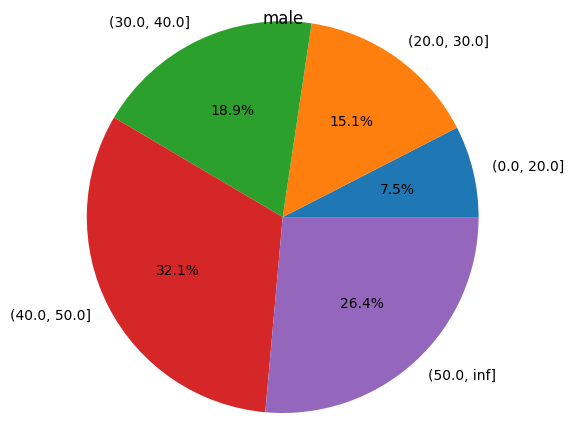

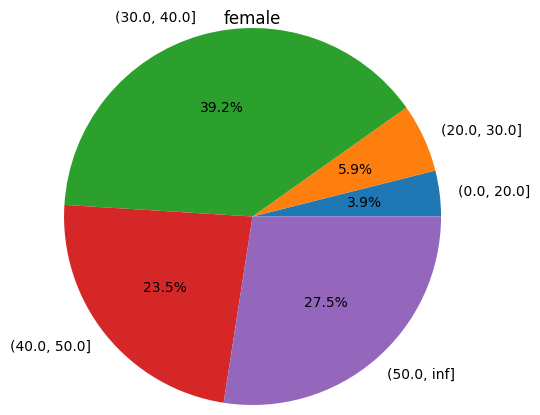

In [12]:
# all we are doing here is using the list we already have from d) and put them into a different kind of graph

# as stated in the task, putting the graphs into scale is not necessaray, but as its just a parameter of the graphs function i´ve included it anyways

# pie chart 3 ( not in the task ) is a combined graph ( male and female )

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
#fig3, ax3 = plt.subplots()
#sizes_all = all_int['count']
sizes_male = male_int['count']
sizes_female = female_int['count']
labels = male_int['range']
ax1.set_title("male")
ax2.set_title("female")
#ax3.set_title("all")
scale = 0.025
ax1.pie(sizes_male, labels=labels, autopct='%1.1f%%', radius=(len(male)*scale))
ax2.pie(sizes_female, labels=labels, autopct='%1.1f%%', radius=(len(female)*scale))
#ax3.pie(sizes_all, labels=labels, autopct='%1.1f%%', radius=(len(df)*scale))

plt.show()


## f) Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Tipps und Hinweise:*** <br>
- Manche Nachkommastellen der hier zu berechnenden Mittelwerte, Varianzen und Standardabweichungen finden Sie in der Datei „Teilergebnisse_xy.txt“. Wenn diese Werte nicht mit Ihren Ergebnissen übereinstimmen, liegt das in den meisten Fällen daran, dass die Tipps oben zu Aufgabe 1b) oder 1c) [Datenbereinigung bzw. Altersberechnung] nicht beachten wurden.
- Für die in Aufgabenteil f) ebenfalls zu berechnenden Mediane und Spannweiten gibt es in der Datei „Teilergebnisse_xy.txt“ Summen, mit der Hilfe Sie eine Kontrolle durchführen können.

In [13]:
# this was arguably the easiest part, as we just create a table and fill it with values. the functions are either from pandas or numpy and are very easy to use.

f = pd.DataFrame(columns=["Mittelwert", "Varianz", "Standartabweichung", "Median", "Spannweite"], index=["Alle", "Frauen", "Männer"])
# average
f.at['Alle', 'Mittelwert'] = df['Alter'].mean()
f.at['Frauen', 'Mittelwert'] = female['Alter'].mean()
f.at['Männer', 'Mittelwert'] = male['Alter'].mean()
# variance
f.at['Alle', 'Varianz'] = df['Alter'].var()
f.at['Frauen', 'Varianz'] = female['Alter'].var()
f.at['Männer', 'Varianz'] = male['Alter'].var()
# deviation
f.at['Alle', 'Standartabweichung'] = df['Alter'].std()
f.at['Frauen', 'Standartabweichung'] = female['Alter'].std()
f.at['Männer', 'Standartabweichung'] = male['Alter'].std()
# median
f.at['Alle', 'Median'] = df['Alter'].median()
f.at['Frauen', 'Median'] = female['Alter'].median()
f.at['Männer', 'Median'] = male['Alter'].median()
# span
f.at['Alle', 'Spannweite'] = np.ptp(df['Alter'])
f.at['Frauen', 'Spannweite'] = np.ptp(female['Alter'])
f.at['Männer', 'Spannweite'] = np.ptp(male['Alter'])


f

,Mittelwert,Varianz,Standartabweichung,Median,Spannweite
Alle,42.173077,143.892084,11.995503,43.0,45
Frauen,42.862745,121.920784,11.041775,42.0,44
Männer,41.509434,166.870102,12.917821,43.0,45


### Hinweise zur Abgabe: 

- Die Abgabedatei zu Aufgabe 1 muss enthalten: 
  1.	Eine Erläuterung der Datenbereinigungsschritte aus b). Geben Sie dazu in einer Tabelle an, bei welchen Datensätzen Bereinigungsschritte erforderlich waren (Liste der Personalnummern der bereinigten Datensätze) und beschreiben Sie für jeden einzelnen Datensatz in dieser Liste, warum eine Bereinigung erforderlich war und welche Bereinigungsschritte Sie durchgeführt haben: Löschung, Änderung (welche?) usw.
  2.	Das Säulendiagramm aus d), beschriftet mit den Anzahlen.
  3.	Die beiden Kreisdiagramme aus e), beschriftet mit den Prozentwerten.
  4.	Ihre Berechnungen zu den Kennzahlen in f).
- Qualitätssicherung: 
  - Falls Ihre Resultate nicht mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt*** übereinstimmen, beachten Sie die Tipps und Hinweise oder kommen Sie in die Laborsprechstunde. 
  - Falls Ihre Abgabe größere Fehler oder wesentliche Mängel aufweist oder Aufgabenteile fehlen, wird die Aufgabe mit „nicht bestanden“ bewertet, und Sie haben nicht die Möglichkeit einer Korrektur.
- Abgabe:
  - Laden Sie das von Ihnen erstelle (und kontrollierte!) jupyter-Notebook mit der Lösung möglichst bald nach der Fertigstellung in Moodle hoch. 
  - Dateiname: Bitte benennen Sie Ihre Abgabedatei nach folgendem Schema: 
    Name_Matrikelnummer_Aufgabennummer_Versionsnummer. <br>
    Beispiel: **Melzer_7654321_A1_V1.ipynb**